In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Cabin'] = dataset['Cabin'].fillna(dataset['Cabin'].mode()[0])
dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mode()[0])

In [5]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: xlabel='Sex', ylabel='Age'>

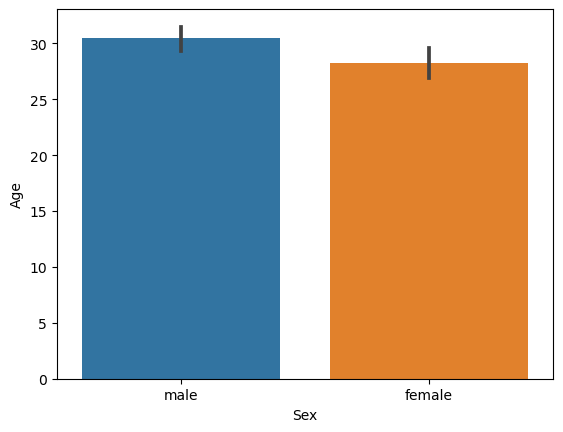

In [6]:
sns.barplot(x='Sex',y='Age',data=dataset)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


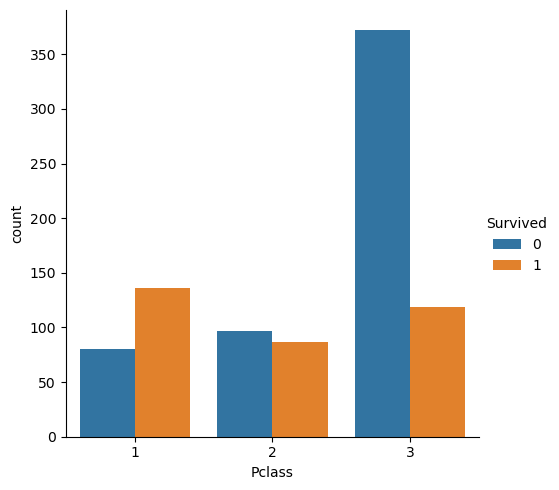

In [7]:
sns.catplot(x='Pclass',hue='Survived',kind='count',data=dataset)

<Axes: xlabel='Pclass', ylabel='Fare'>

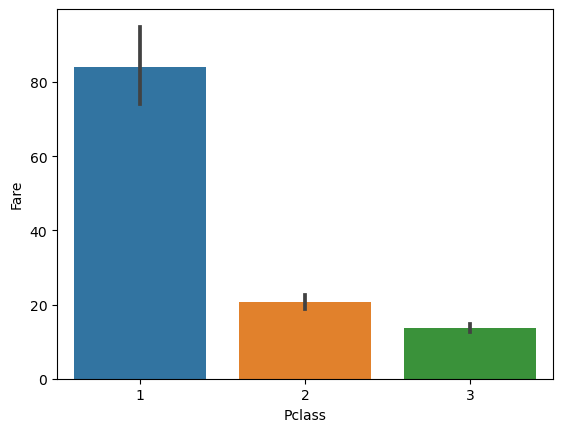

In [8]:
sns.barplot(x='Pclass',y='Fare',data=dataset)

<Axes: xlabel='Pclass', ylabel='Age'>

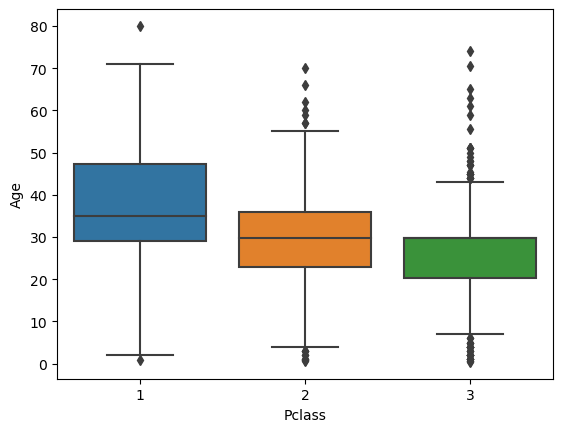

In [9]:
sns.boxplot(x= 'Pclass', y = 'Age', data=dataset)

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


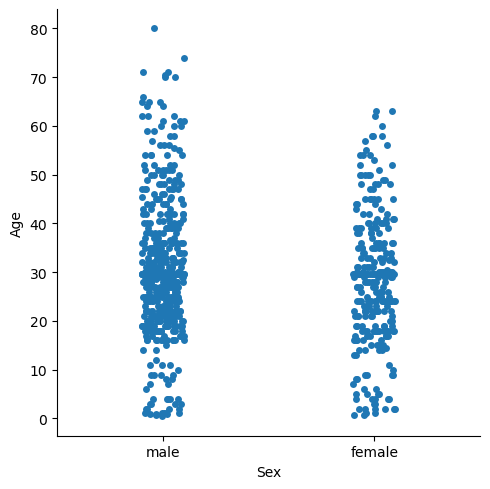

In [10]:
sns.catplot(x= 'Sex', y = 'Age', data=dataset, kind='strip')

C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


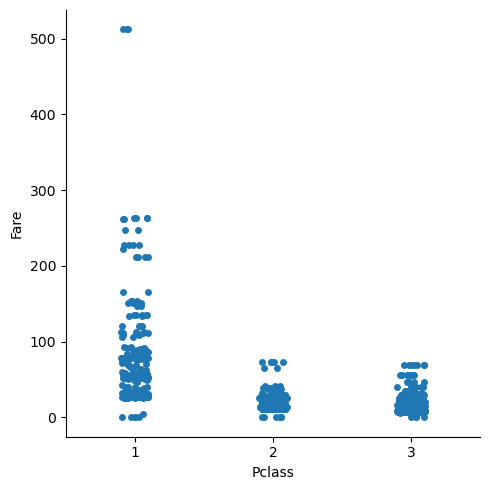

In [11]:
sns.catplot(x= 'Pclass', y = 'Fare', data=dataset, kind = 'strip')

<Axes: xlabel='Fare', ylabel='Count'>

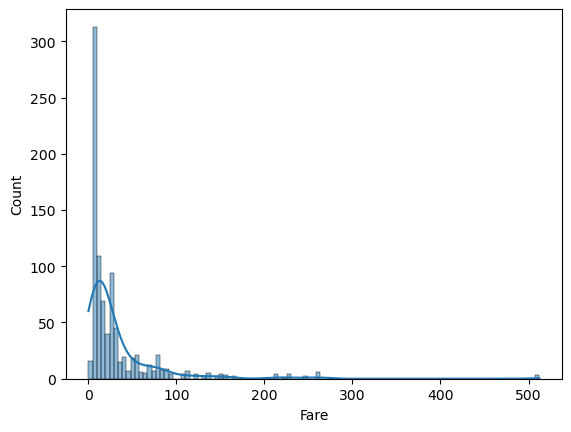

In [12]:
#Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.
sns.histplot(dataset['Fare'],kde=True)

In [13]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

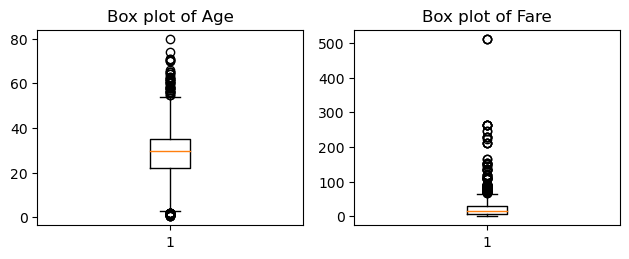

In [14]:
def showOutliers():
    for i, col in enumerate(['Age', 'Fare']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(dataset[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [18]:
numeric_cols = dataset.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = dataset[col].quantile(0.25)
    q3 = dataset[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    dataset = dataset[(dataset[col]>=lower_bound)&(dataset[col]<=upper_bound)]

dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,B96 B98,Q
12,13,0,3,"Saundercock, Mr. William Henry",male,20.000000,0,0,A/5. 2151,8.0500,B96 B98,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.000000,0,0,350406,7.8542,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.000000,0,0,7552,10.5167,B96 B98,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.000000,0,0,C.A./SOTON 34068,10.5000,B96 B98,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,B96 B98,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S


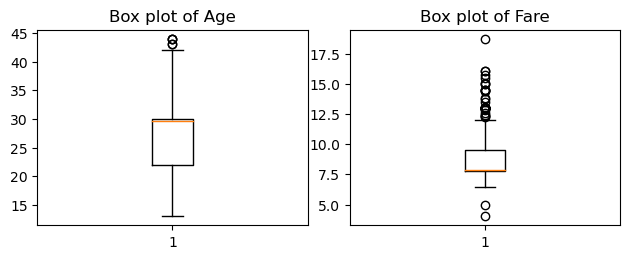

In [21]:
showOutliers()

In [26]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(dataset[dataset.select_dtypes(include=np.number).columns])
print("Normalized Data (Min-Max Scaling):")
print(normalized_data)

Normalized Data (Min-Max Scaling):
[[0.         1.         1.         ... 0.         0.         0.26480541]
 [0.00225225 0.         1.         ... 0.         0.         0.27326565]
 [0.00337838 0.         1.         ... 0.         0.         0.30090017]
 ...
 [0.99324324 0.         1.         ... 0.         0.         0.20558376]
 [0.9954955  0.         0.5        ... 0.         0.         0.60829103]
 [1.         0.         1.         ... 0.         0.         0.25296108]]
